In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [348]:
df_companies = pd.read_csv('data.csv')

# Delete duplicates

In [349]:
# delete duplicate rows
print(df_companies.shape)
df_companies = df_companies.drop_duplicates()
print(df_companies.shape)


(43405, 66)


(43004, 66)


In [350]:
df_companies.describe()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,class
count,43004.000000,42996.000000,42996.000000,42996.000000,42871.000000,4.291500e+04,42996.000000,42996.000000,42911.000000,42995.000000,...,4.287900e+04,42997.000000,4.292200e+04,42997.000000,4.086600e+04,42903.000000,4.287900e+04,42871.000000,42200.000000,43004.000000
mean,2.940401,0.040780,0.591872,0.113666,6.344235,-3.861903e+02,-0.057602,0.097948,12.030065,2.574874,...,-2.646426e+01,-0.010005,3.029692e+01,1.337995,4.521915e+02,17.114198,1.509629e+03,9.367905,72.659202,0.048437
std,1.283303,2.740898,5.869842,5.464662,296.808855,6.151054e+04,7.234776,5.666259,487.711379,60.402520,...,5.352594e+03,13.735315,5.359190e+03,122.670830,3.249795e+04,555.617794,1.399453e+05,124.751721,2378.347342,0.214691
min,1.000000,-463.890000,-430.870000,-479.960000,-0.403110,-1.190000e+07,-508.410000,-517.480000,-141.410000,-3.496000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.340000e+06,-1.543200,-10677.000000,0.000000
25%,2.000000,0.003386,0.269907,0.021539,1.049400,-4.911200e+01,0.000000,0.005740,0.428740,1.018900,...,9.234000e-03,0.014760,8.755800e-01,0.000000,5.546800e+00,4.516650,4.208100e+01,3.099500,2.184450,0.000000
50%,3.000000,0.049661,0.472370,0.196830,1.569700,-9.173300e-01,0.000000,0.059602,1.067300,1.198600,...,5.287000e-02,0.120040,9.510550e-01,0.006155,9.796650e+00,6.647200,7.125000e+01,5.091400,4.307350,0.000000
75%,4.000000,0.129730,0.689090,0.403650,2.785450,5.075350e+01,0.087708,0.151080,2.602900,2.069650,...,1.288000e-01,0.285440,9.926900e-01,0.236440,2.025975e+01,10.426500,1.170950e+02,8.612000,9.830275,0.000000
max,5.000000,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


In [351]:
missing_values = df_companies.isnull().sum()

missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print(missing_values)

A37    18836
A21     5836
A27     2750
A60     2138
A45     2133
       ...  
A35        8
A1         8
A57        7
A59        7
A55        1
Length: 64, dtype: int64


In [352]:
missing_values_rows = df_companies.isnull().sum(axis=1)

missing_values_rows_sorted = missing_values_rows[missing_values_rows > 0].sort_values(ascending=False)

print(missing_values_rows_sorted)

42379    41
5395     40
14383    36
24709    35
14352    35
         ..
21339     1
21340     1
21343     1
21344     1
43404     1
Length: 23267, dtype: int64


In [353]:
correlation = df_companies.corr()

In [354]:
print(correlation['class'].sort_values(ascending=False))

class    1.000000
year     0.043311
A2       0.035273
A51      0.034790
A32      0.007079
           ...   
A55     -0.021905
A1      -0.029750
A6      -0.034700
A3      -0.035161
A29     -0.054248
Name: class, Length: 66, dtype: float64


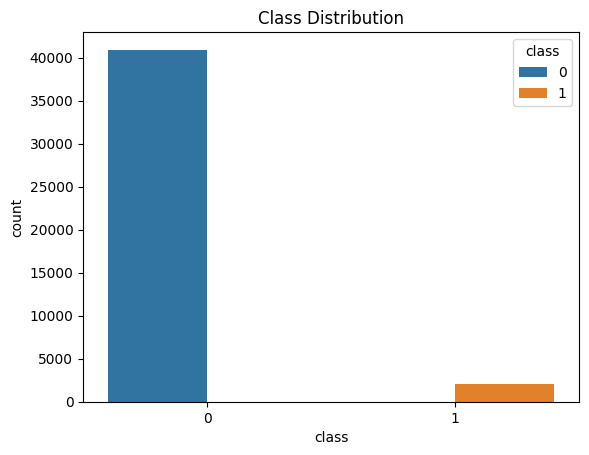

In [355]:
sns.countplot(x='class', data=df_companies, hue='class')
plt.title('Class Distribution')
plt.show()

# Dataset clean up

We delete column A37 almost half of data is missing
Year column shouldn't be feature
Rows with half of the data missing are deleted

In [435]:
SEED = 42
print(df_companies.shape)

df_cleared = df_companies.drop(columns=['year', 'A37'])
df_cleared = df_cleared.dropna(thresh=df_companies.shape[1] / 2)

print(df_cleared.shape)

X = df_cleared.drop('class', axis=1)
y = df_cleared['class']

(43004, 66)
(42992, 64)


In [436]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_classification(X, y, title='Random Forest'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
    clf = RandomForestClassifier(random_state=SEED)
    clf.fit(X_train, y_train)
    # check the most true positive
    y_pred = clf.predict(X_test)
    return {
        'Name': title,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }


Take care of the missing values in the dataset:
* Replace missing values in the numerical columns with the mean of the column
* Use Knn imputer to replace missing values in the categorical columns
* Use Iterative imputer to replace missing values in the numerical columns

In [437]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

In [438]:
knn = KNNImputer(n_neighbors=5)
X_imputed_knn = knn.fit_transform(X)

iterative = IterativeImputer(max_iter=10, random_state=SEED)
X_imputed_iterative = iterative.fit_transform(X)

X_imputed_simple = X.copy()

for clazz in df_cleared['class'].unique():
    class_mask = df_cleared['class'] == clazz
    class_df = X_imputed_simple[class_mask]
    simple = SimpleImputer(strategy='mean')
    class_imputed = simple.fit_transform(class_df)
    X_imputed_simple[class_mask] = class_imputed


c:\Users\Konrad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [439]:
list_of_results = []

for X_imputed, title in zip([X_imputed_knn,X_imputed_simple, X_imputed_iterative], ['KNN', 'Simple', 'Iterative']):
    list_of_results.append(test_classification(X_imputed, y, title))

df = pd.DataFrame(list_of_results)
df

,Name,Accuracy,Precision,Recall,F1
0,KNN,0.951506,0.500000,0.069544,0.122105
1,Simple,0.966391,0.900000,0.345324,0.499133
2,Iterative,0.962786,0.839161,0.287770,0.428571


# Delete outliers

<Figure size 2500x500 with 0 Axes>

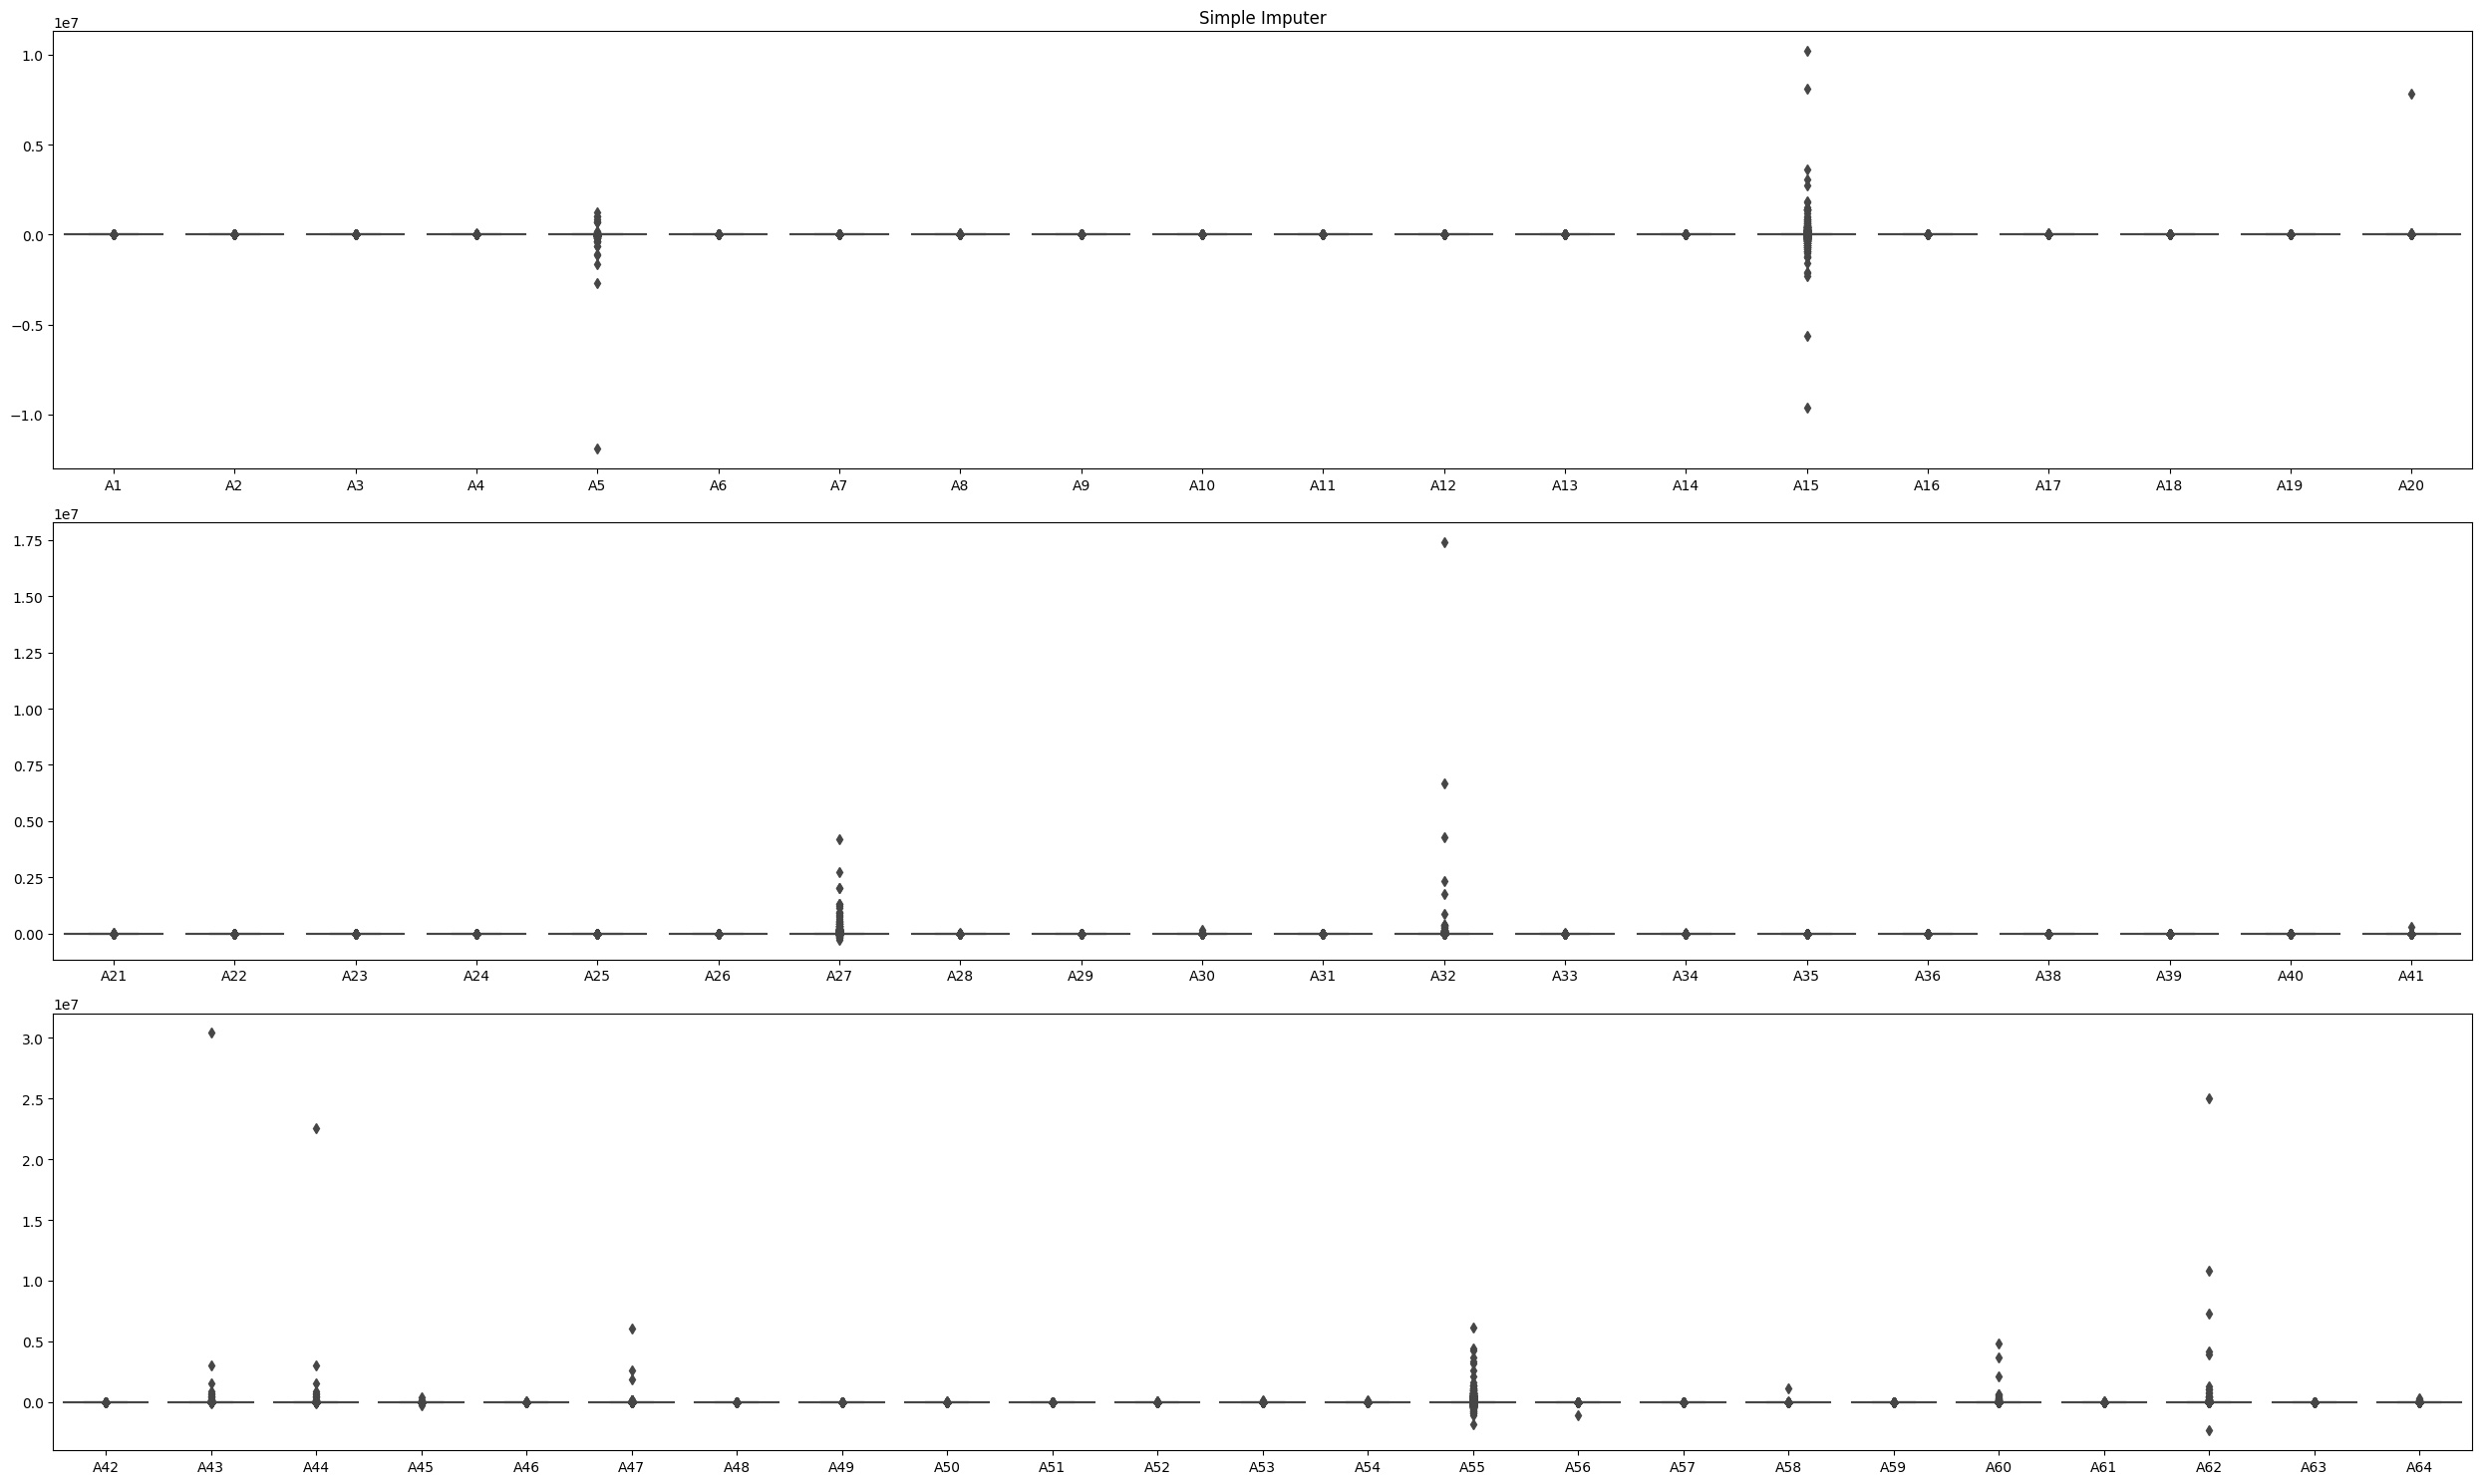

<Figure size 2500x500 with 0 Axes>

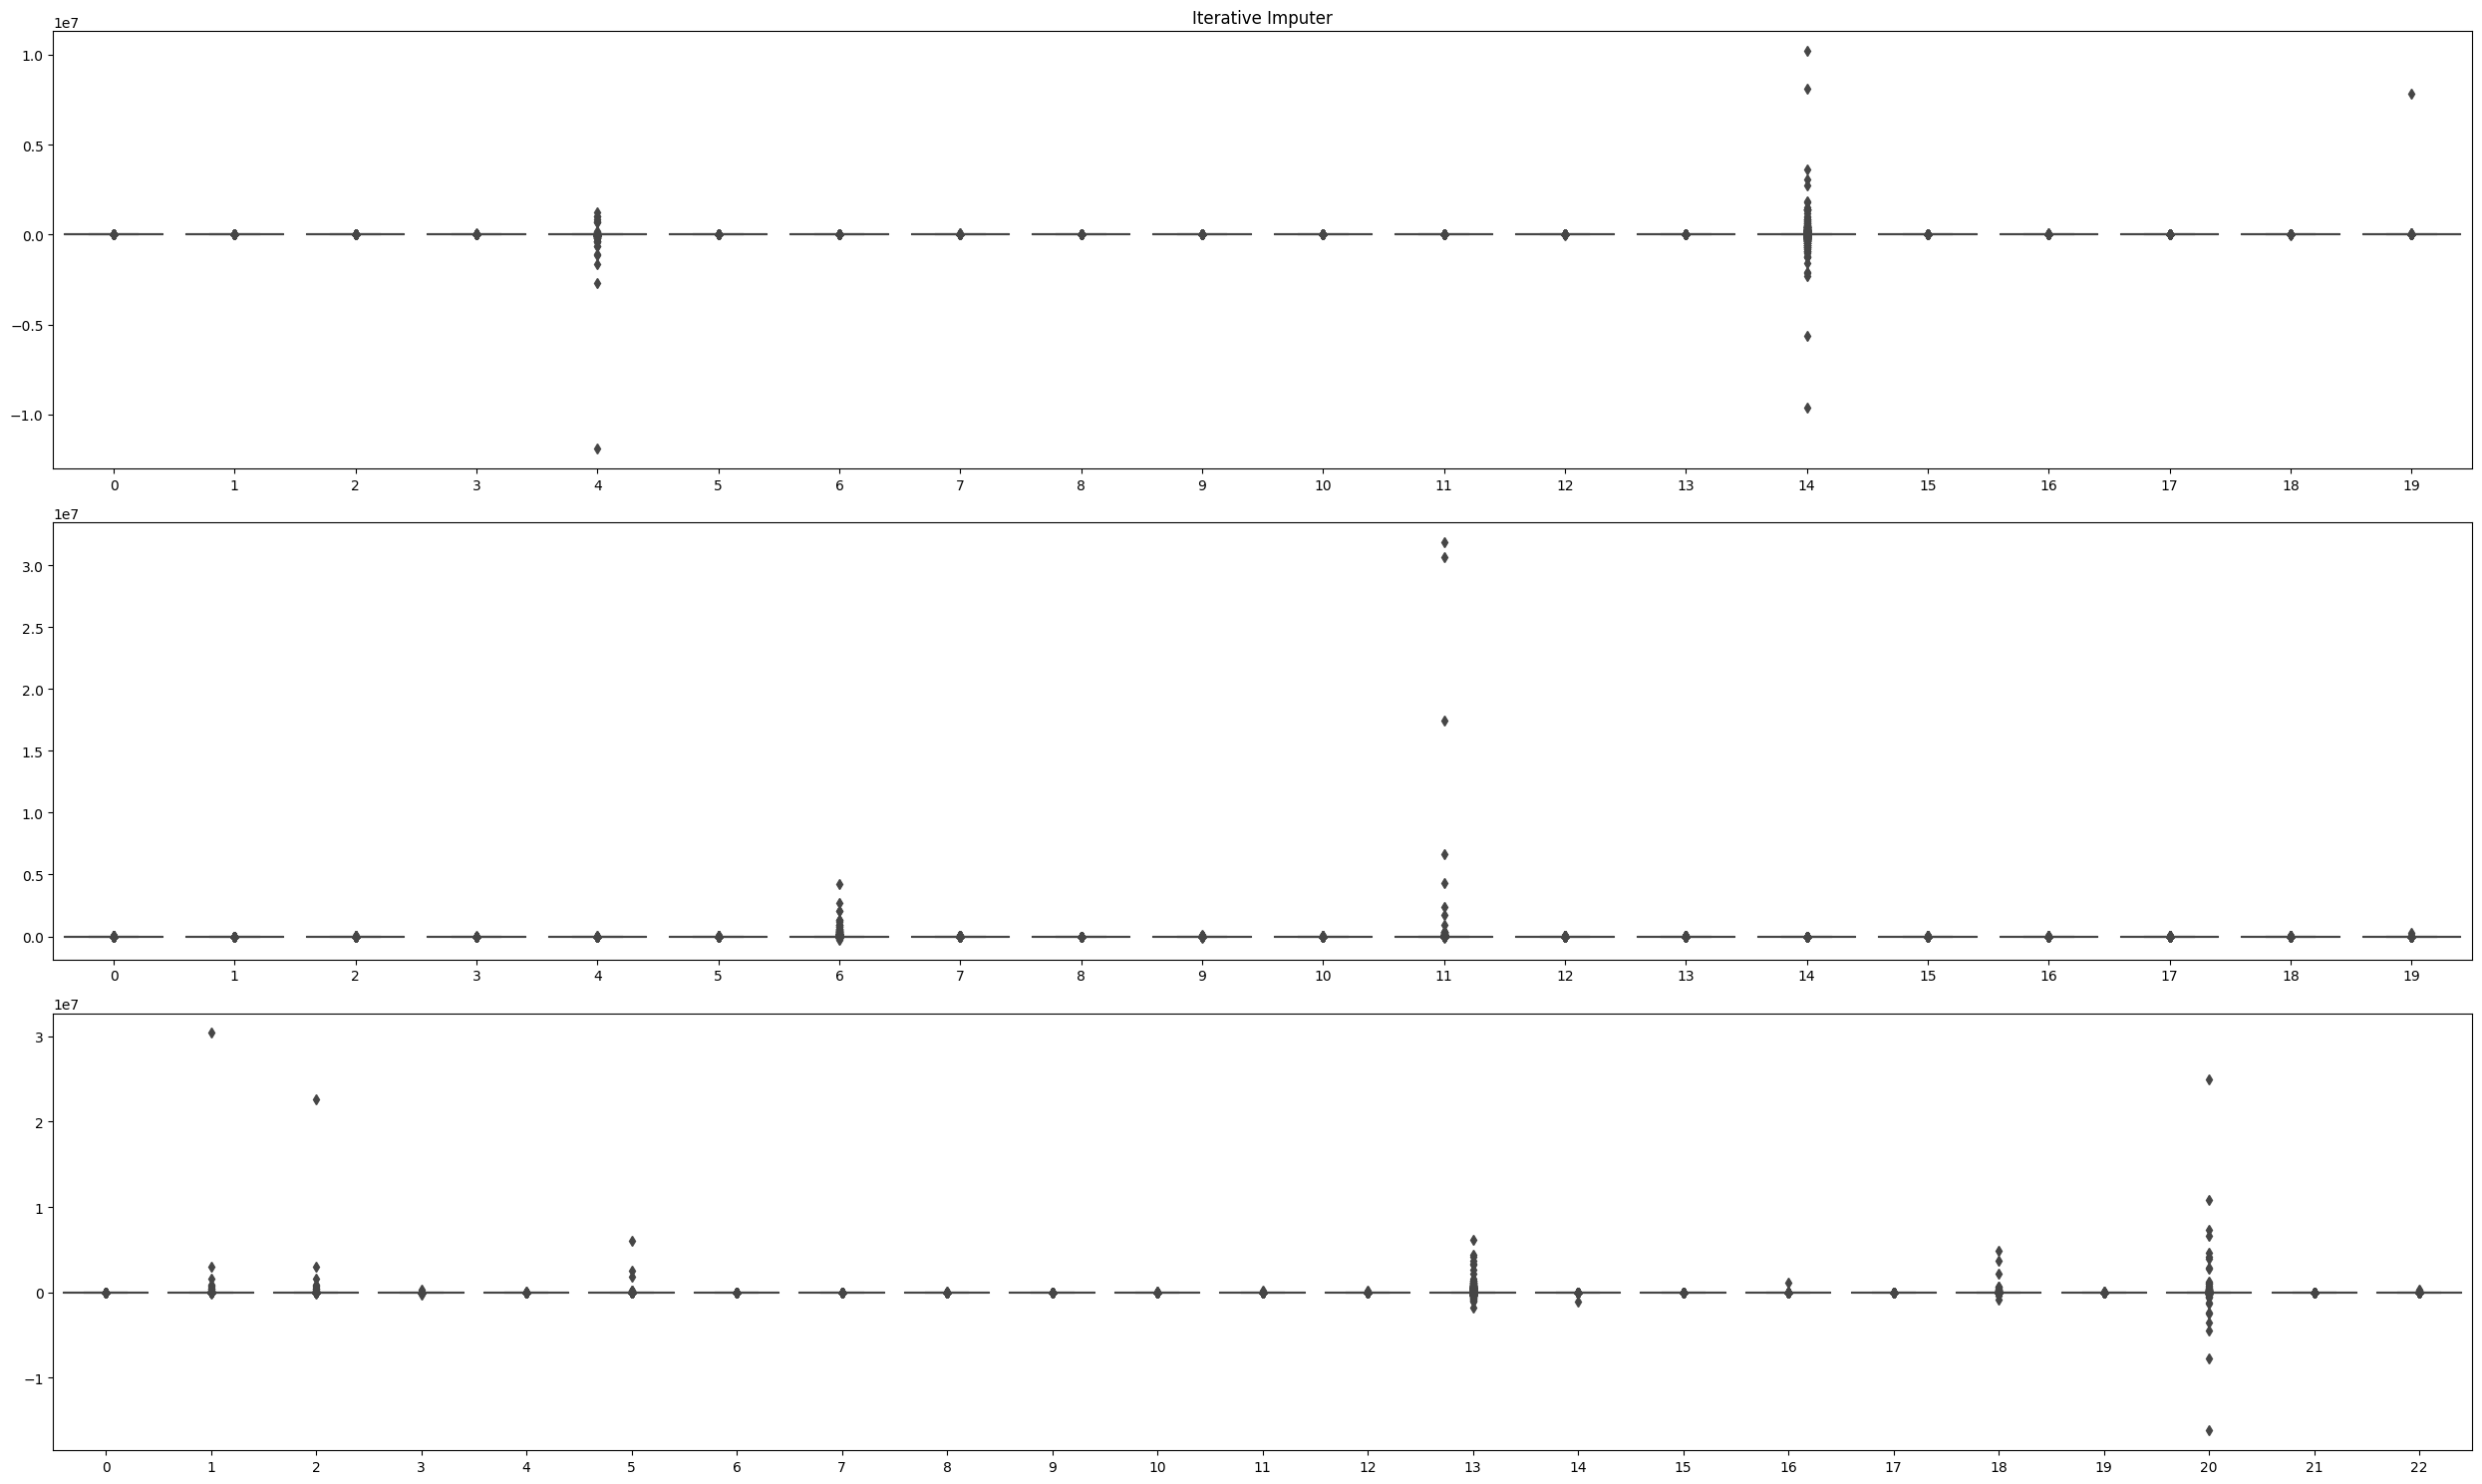

In [440]:
plt.figure(figsize=(25, 5))
fig, axs = plt.subplots(3, 1, figsize=(25, 15))

sns.boxplot(data=X_imputed_simple.iloc[:,:20], ax=axs[0])
sns.boxplot(data=X_imputed_simple.iloc[:,20:40], ax=axs[1])
sns.boxplot(data=X_imputed_simple.iloc[:,40:], ax=axs[2])
axs[0].set_title('Simple Imputer')
plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 5))
fig, axs = plt.subplots(3, 1, figsize=(25, 15))
axs[0].set_title('Iterative Imputer')
sns.boxplot(data=X_imputed_iterative[:,:20], ax=axs[0])
sns.boxplot(data=X_imputed_iterative[:,20:40], ax=axs[1])
sns.boxplot(data=X_imputed_iterative[:,40:], ax=axs[2])
plt.tight_layout()
plt.show()


In [441]:
from sklearn.ensemble import IsolationForest


clf = IsolationForest(random_state=SEED, contamination=0.01)
outliers_itr = clf.fit_predict(X_imputed_iterative)
nr_of_outliers = outliers_itr.tolist().count(-1)
print(f'Number of outliers Iterative: {nr_of_outliers}')


clf = IsolationForest(random_state=SEED, contamination=0.01)
outliers_s = clf.fit_predict(X_imputed_simple)
nr_of_outliers = outliers_s.tolist().count(-1)
print(f'Number of outliers Simple: {nr_of_outliers}')

Number of outliers Iterative: 430


c:\Users\Konrad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers Simple: 430


In [442]:
X_imputed_s_o = X_imputed_knn[outliers_s == 1]
y_imputed_s_o = y[outliers_s == 1]

X_imputed_iterative_o = X_imputed_iterative[outliers_itr == 1]
y_imputed_iterative_o = y[outliers_itr == 1]


In [443]:
list_of_results = []

for data, title in zip([(X_imputed_s_o, y_imputed_s_o), (X_imputed_iterative_o, y_imputed_iterative_o)], ['Simple Outliers', 'Iterative Outliers']):
    list_of_results.append(test_classification(data[0], data[1], title))

df = pd.concat([df, pd.DataFrame(list_of_results)], ignore_index=True)
df

,Name,Accuracy,Precision,Recall,F1
0,KNN,0.951506,0.500000,0.069544,0.122105
1,Simple,0.966391,0.900000,0.345324,0.499133
2,Iterative,0.962786,0.839161,0.287770,0.428571
3,Simple Outliers,0.951134,0.430556,0.076355,0.129707
4,Iterative Outliers,0.965817,0.855346,0.336634,0.483126


# Standardize the data

In [444]:
scaler = StandardScaler(with_mean=False)
X_imputed_s_o_scaled = scaler.fit_transform(X_imputed_s_o)
scaler = StandardScaler(with_mean=False)
X_imputed_iterative_o_scaled = scaler.fit_transform(X_imputed_iterative_o)

<Figure size 2500x500 with 0 Axes>

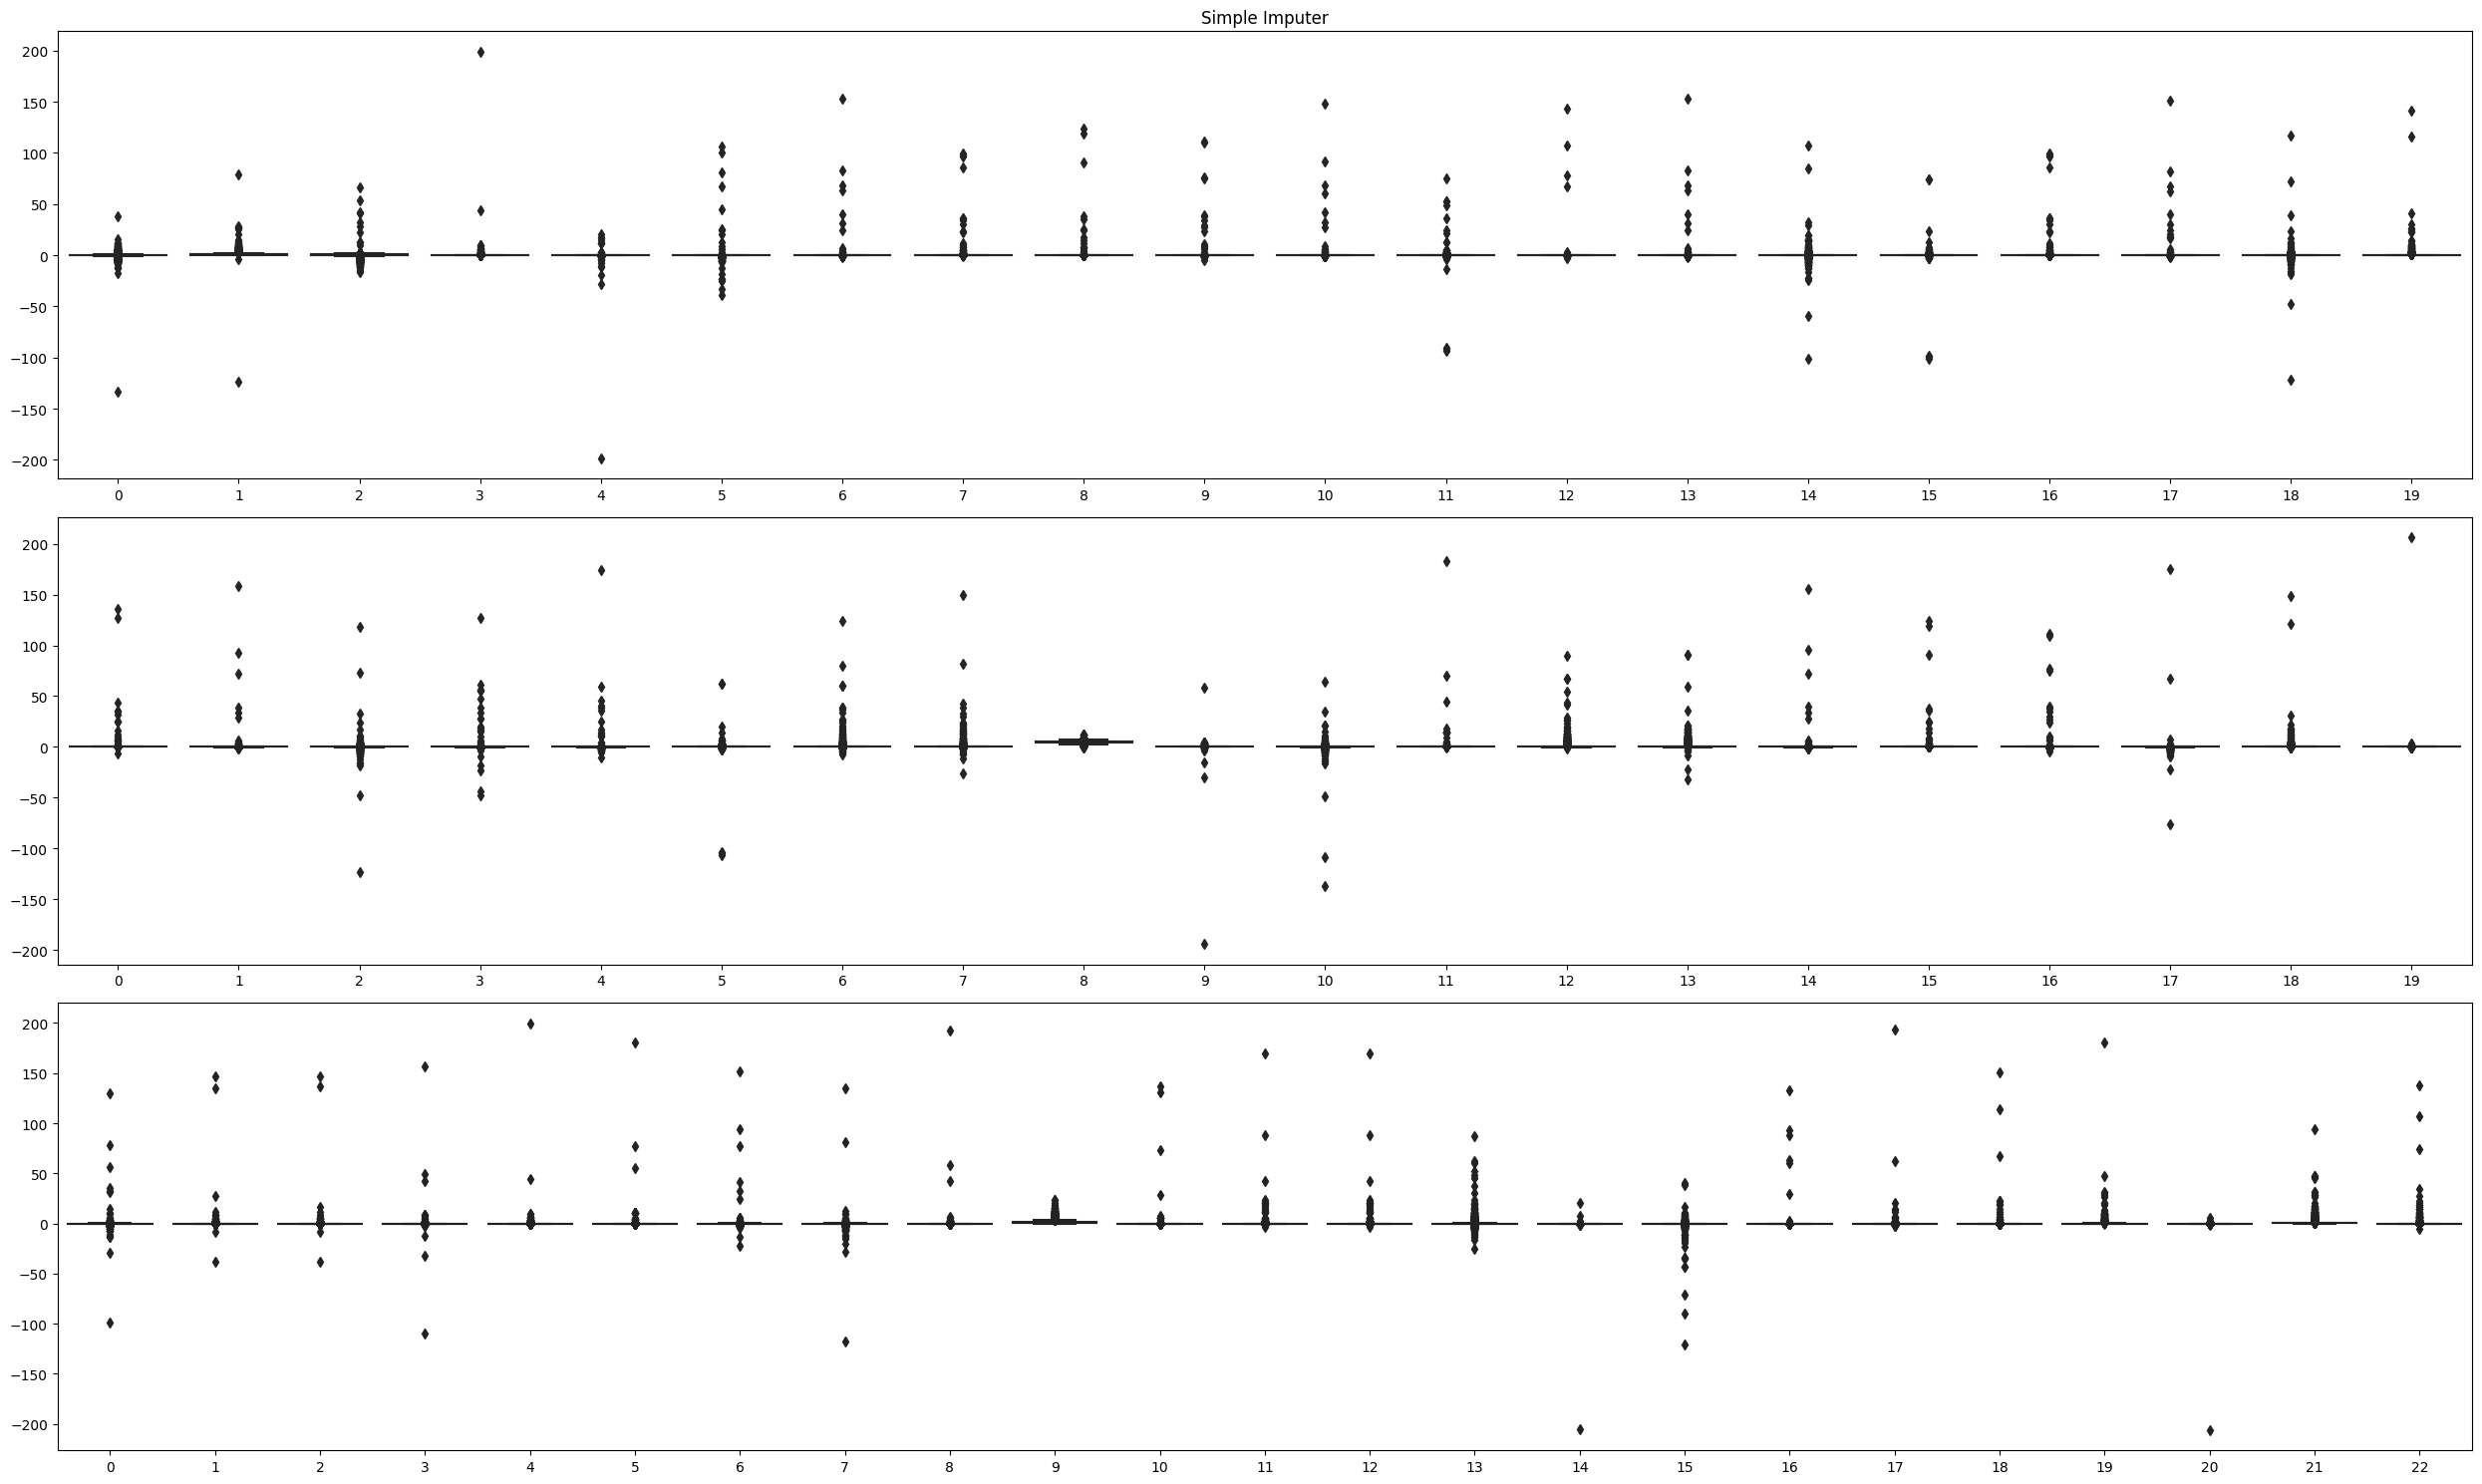

<Figure size 2500x500 with 0 Axes>

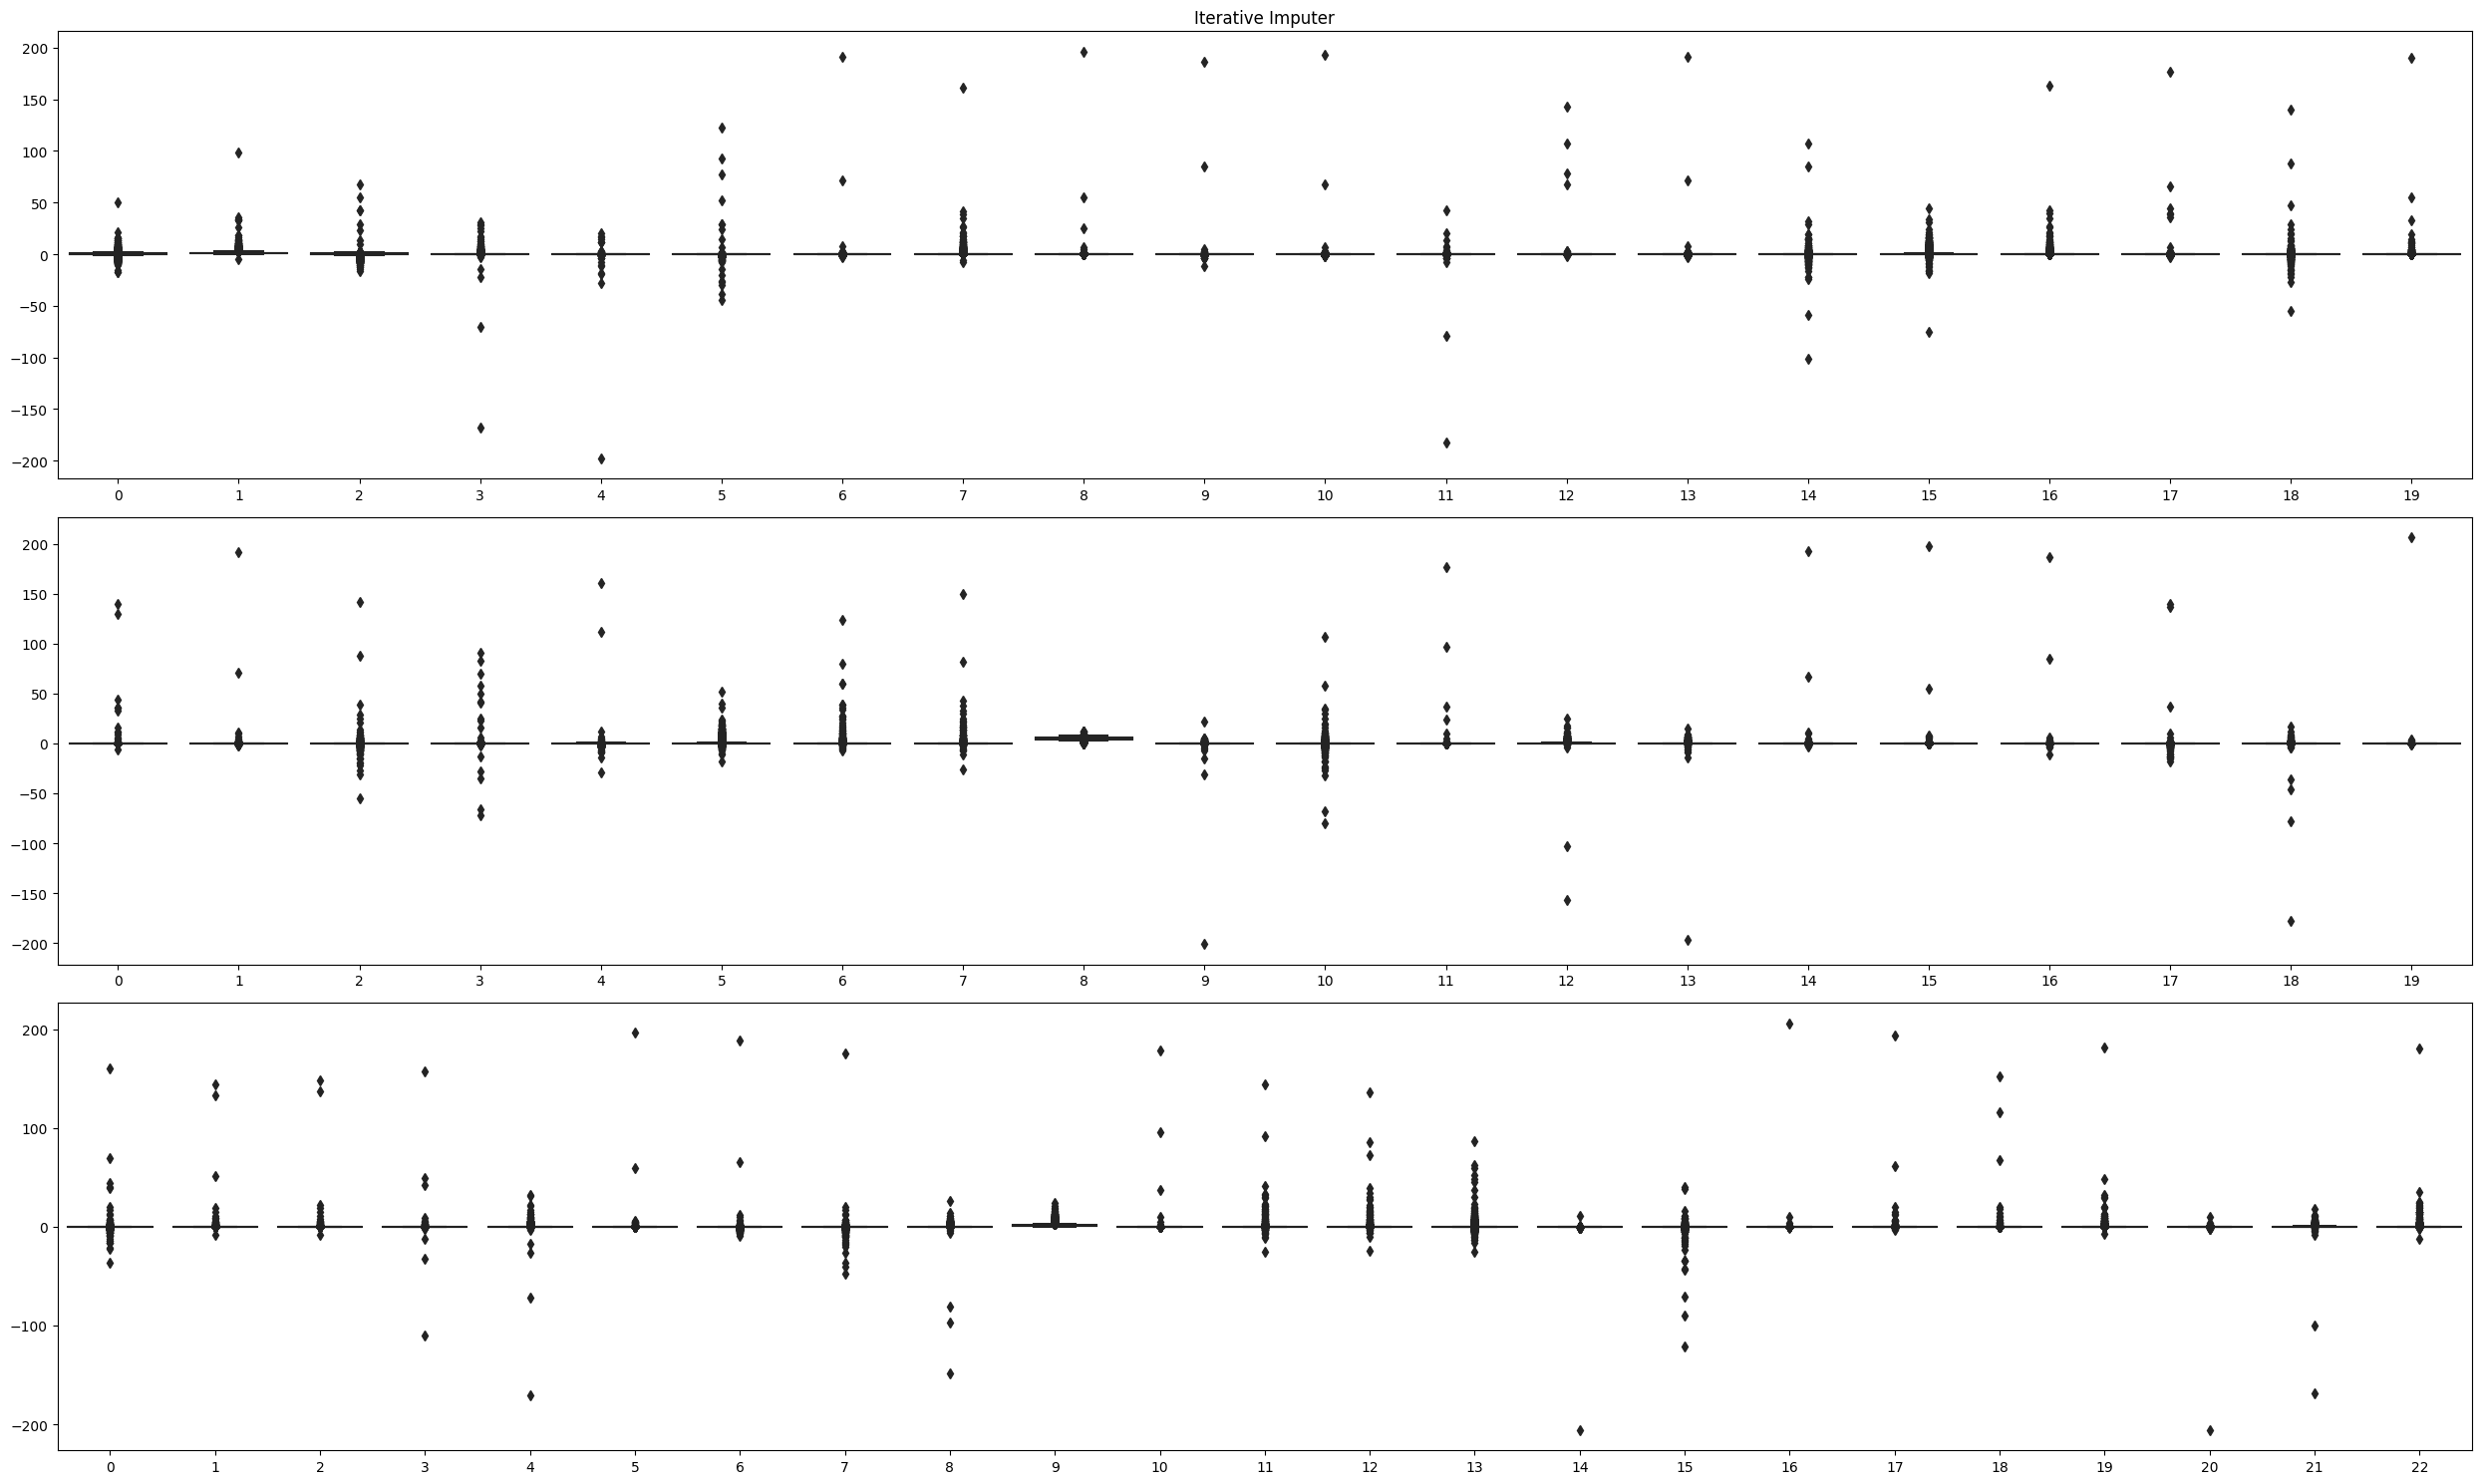

In [445]:
plt.figure(figsize=(25, 5))
fig, axs = plt.subplots(3, 1, figsize=(25, 15))

sns.boxplot(data=X_imputed_s_o_scaled[:,:20], ax=axs[0], palette='viridis')
sns.boxplot(data=X_imputed_s_o_scaled[:,20:40], ax=axs[1], palette='viridis')
sns.boxplot(data=X_imputed_s_o_scaled[:,40:], ax=axs[2], palette='viridis')
axs[0].set_title('Simple Imputer')
plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 5))
fig, axs = plt.subplots(3, 1, figsize=(25, 15))
axs[0].set_title('Iterative Imputer')
sns.boxplot(data=X_imputed_iterative_o_scaled[:,:20], ax=axs[0], palette='viridis')
sns.boxplot(data=X_imputed_iterative_o_scaled[:,20:40], ax=axs[1], palette='viridis')
sns.boxplot(data=X_imputed_iterative_o_scaled[:,40:], ax=axs[2], palette='viridis')
plt.tight_layout()
plt.show()

In [446]:
list_of_results = []

for data, title in zip([(X_imputed_s_o_scaled, y_imputed_s_o), (X_imputed_iterative_o_scaled, y_imputed_iterative_o)], ['Simple Outliers Standardized', 'Iterative Outliers Standardized']):
    list_of_results.append(test_classification(data[0], data[1], title))

df = pd.concat([df, pd.DataFrame(list_of_results)], ignore_index=True)
df

,Name,Accuracy,Precision,Recall,F1
0,KNN,0.951506,0.500000,0.069544,0.122105
1,Simple,0.966391,0.900000,0.345324,0.499133
2,Iterative,0.962786,0.839161,0.287770,0.428571
3,Simple Outliers,0.951134,0.430556,0.076355,0.129707
4,Iterative Outliers,0.965817,0.855346,0.336634,0.483126
5,Simple Outliers Standardized,0.951721,0.466667,0.086207,0.145530
6,Iterative Outliers Standardized,0.965700,0.863636,0.329208,0.476703


# Normalize the data

In [447]:
min_max = MinMaxScaler()
X_imputed_knn_o_no = min_max.fit_transform(X_imputed_s_o)
min_max = MinMaxScaler()
X_imputed_iterative_o_no = min_max.fit_transform(X_imputed_iterative_o)

<Figure size 2500x500 with 0 Axes>

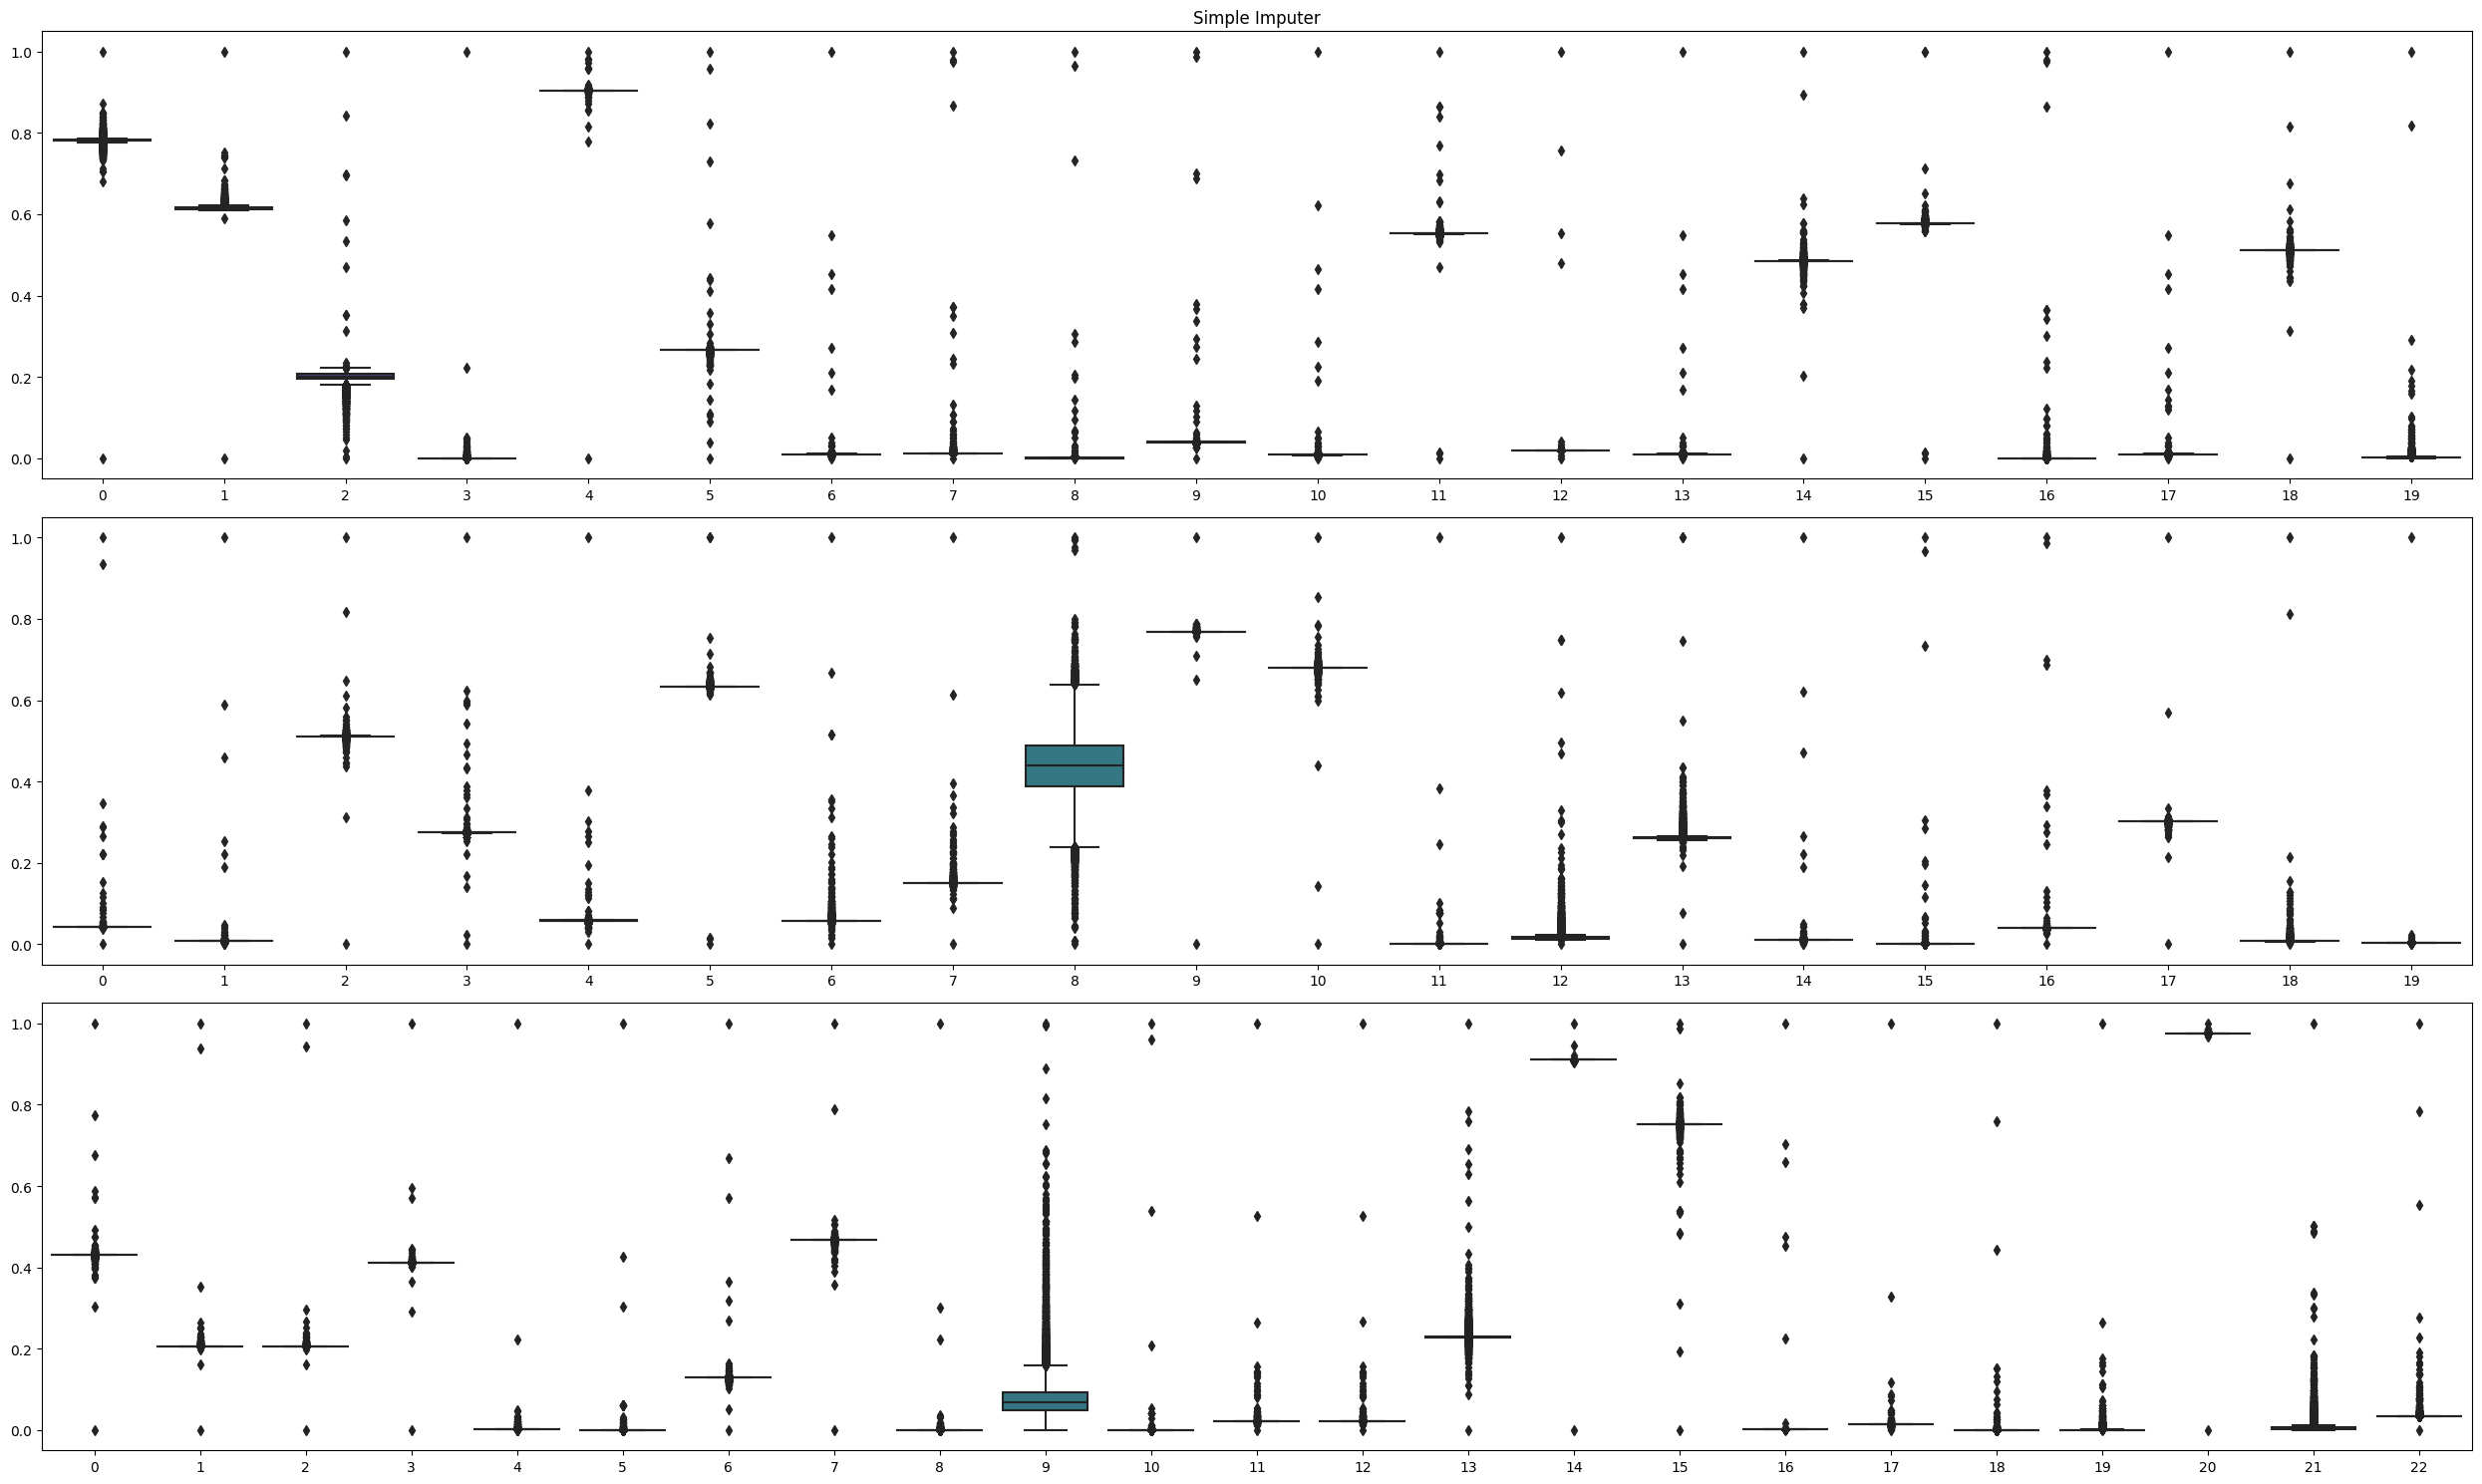

<Figure size 2500x500 with 0 Axes>

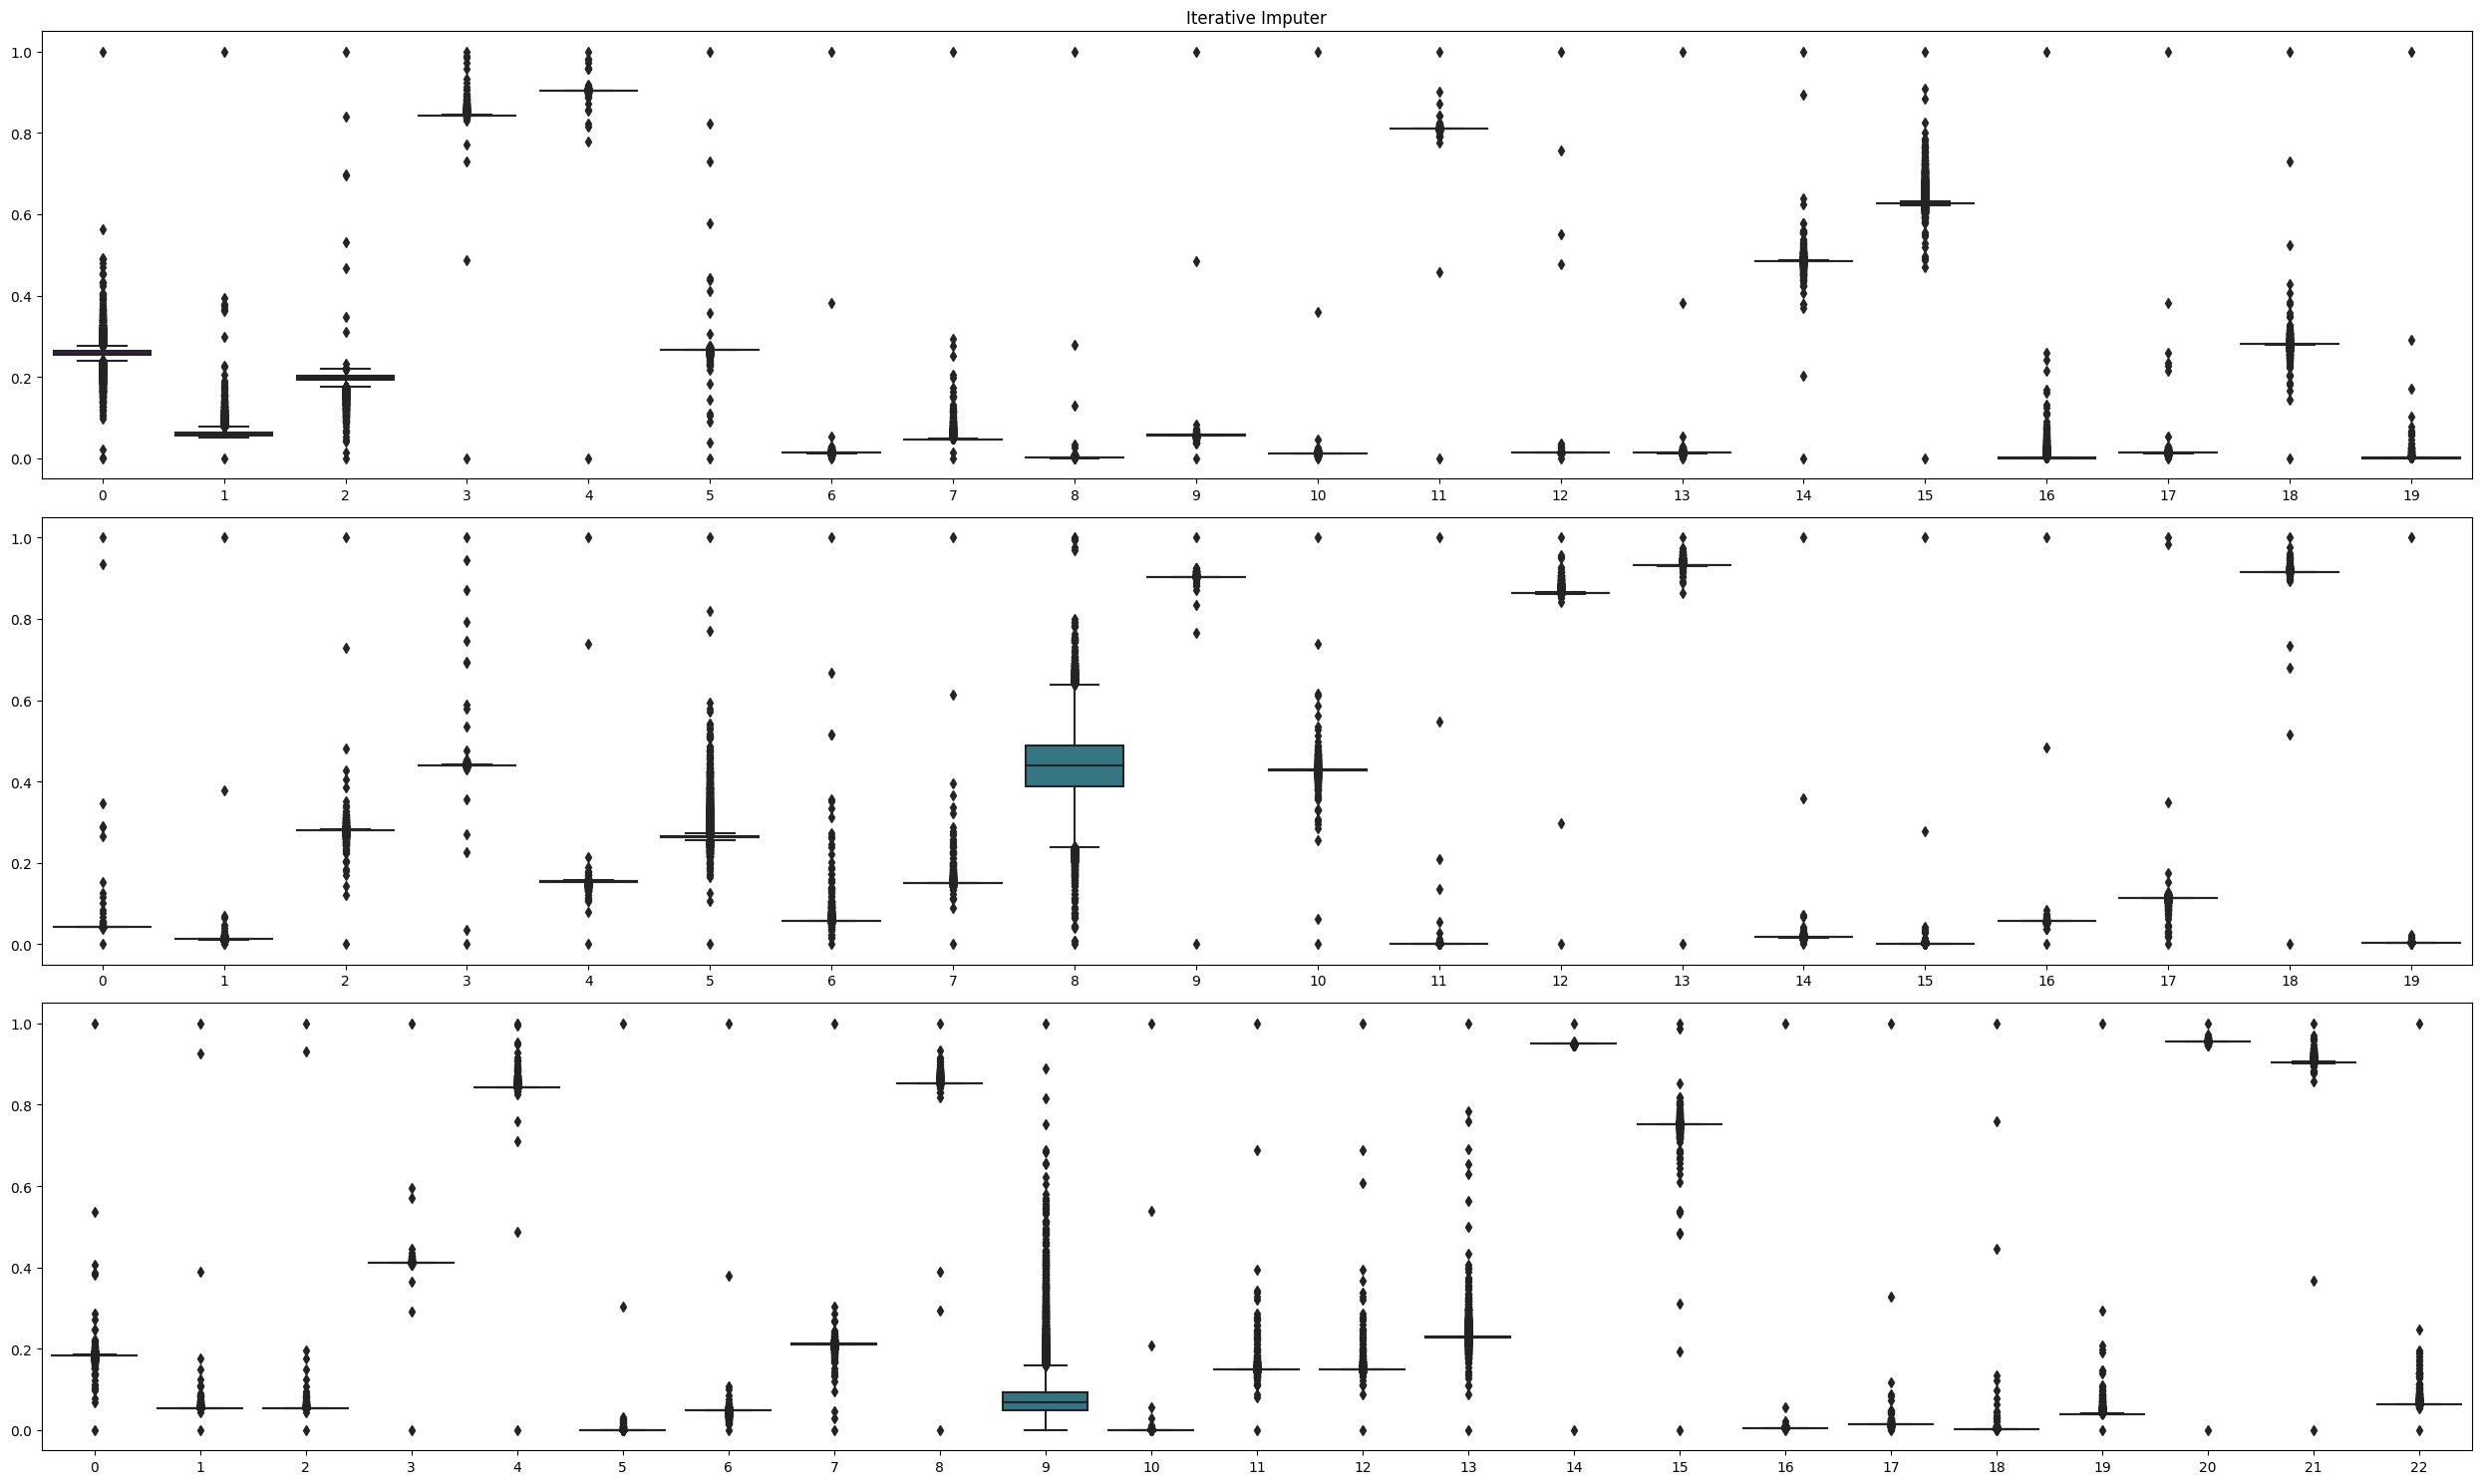

In [448]:
plt.figure(figsize=(25, 5))
fig, axs = plt.subplots(3, 1, figsize=(25, 15))

sns.boxplot(data=X_imputed_knn_o_no[:,:20], ax=axs[0], palette='viridis')
sns.boxplot(data=X_imputed_knn_o_no[:,20:40], ax=axs[1], palette='viridis')
sns.boxplot(data=X_imputed_knn_o_no[:,40:], ax=axs[2], palette='viridis')
axs[0].set_title('Simple Imputer')
plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 5))
fig, axs = plt.subplots(3, 1, figsize=(25, 15))
axs[0].set_title('Iterative Imputer')
sns.boxplot(data=X_imputed_iterative_o_no[:,:20], ax=axs[0], palette='viridis')
sns.boxplot(data=X_imputed_iterative_o_no[:,20:40], ax=axs[1], palette='viridis')
sns.boxplot(data=X_imputed_iterative_o_no[:,40:], ax=axs[2], palette='viridis')
plt.tight_layout()
plt.show()

In [449]:
list_of_results = []

for data, title in zip([(X_imputed_knn_o_no, y_imputed_s_o), (X_imputed_iterative_o_no, y_imputed_iterative_o)], ['Simple Outliers Normalized', 'Iterative Outliers Normalized']):
    list_of_results.append(test_classification(data[0], data[1], title))

df = pd.concat([df, pd.DataFrame(list_of_results)], ignore_index=True)
df

,Name,Accuracy,Precision,Recall,F1
0,KNN,0.951506,0.500000,0.069544,0.122105
1,Simple,0.966391,0.900000,0.345324,0.499133
2,Iterative,0.962786,0.839161,0.287770,0.428571
3,Simple Outliers,0.951134,0.430556,0.076355,0.129707
4,Iterative Outliers,0.965817,0.855346,0.336634,0.483126
5,Simple Outliers Standardized,0.951721,0.466667,0.086207,0.145530
6,Iterative Outliers Standardized,0.965700,0.863636,0.329208,0.476703
7,Simple Outliers Normalized,0.950781,0.413333,0.076355,0.128898
8,Iterative Outliers Normalized,0.965465,0.848101,0.331683,0.476868


# Standarize the data but without outliers

In [450]:
scaler = StandardScaler(with_mean=False)
X_imputed_s_scaled = scaler.fit_transform(X_imputed_simple)
scaler = StandardScaler(with_mean=False)
X_imputed_iterative_scaled = scaler.fit_transform(X_imputed_iterative)

In [451]:
list_of_results = []

for data, title in zip([(X_imputed_s_scaled, y), (X_imputed_iterative_scaled, y)], ['Simple Standardized', 'Iterative Standardized']):
    list_of_results.append(test_classification(data[0], data[1], title))

df = pd.concat([df, pd.DataFrame(list_of_results)], ignore_index=True)
df

,Name,Accuracy,Precision,Recall,F1
0,KNN,0.951506,0.500000,0.069544,0.122105
1,Simple,0.966391,0.900000,0.345324,0.499133
2,Iterative,0.962786,0.839161,0.287770,0.428571
3,Simple Outliers,0.951134,0.430556,0.076355,0.129707
4,Iterative Outliers,0.965817,0.855346,0.336634,0.483126
5,Simple Outliers Standardized,0.951721,0.466667,0.086207,0.145530
6,Iterative Outliers Standardized,0.965700,0.863636,0.329208,0.476703
7,Simple Outliers Normalized,0.950781,0.413333,0.076355,0.128898
8,Iterative Outliers Normalized,0.965465,0.848101,0.331683,0.476868
9,Simple Standardized,0.966508,0.900621,0.347722,0.501730


In [452]:
df.sort_values(by='Recall', ascending=False)

,Name,Accuracy,Precision,Recall,F1
9,Simple Standardized,0.966508,0.900621,0.347722,0.501730
1,Simple,0.966391,0.900000,0.345324,0.499133
4,Iterative Outliers,0.965817,0.855346,0.336634,0.483126
8,Iterative Outliers Normalized,0.965465,0.848101,0.331683,0.476868
6,Iterative Outliers Standardized,0.965700,0.863636,0.329208,0.476703
2,Iterative,0.962786,0.839161,0.287770,0.428571
10,Iterative Standardized,0.962321,0.816327,0.287770,0.425532
5,Simple Outliers Standardized,0.951721,0.466667,0.086207,0.145530
3,Simple Outliers,0.951134,0.430556,0.076355,0.129707
7,Simple Outliers Normalized,0.950781,0.413333,0.076355,0.128898


# Reduce the dimensionality of the data

In [454]:
from sklearn.decomposition import PCA
from umap import UMAP

pca = PCA(n_components=2, random_state=SEED)
X_pca = pca.fit_transform(X_imputed_iterative_o)

pca_32 = PCA(n_components=32, random_state=SEED)
X_pca_32 = pca_32.fit_transform(X_imputed_iterative_o)

In [455]:
umap = UMAP(n_components=2, random_state=SEED)
X_umap = umap.fit_transform(X_imputed_iterative_o)

umap_32 = UMAP(n_components=32, random_state=SEED)
X_umap_32 = umap_32.fit_transform(X_imputed_iterative_o)

c:\Users\Konrad\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Konrad\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


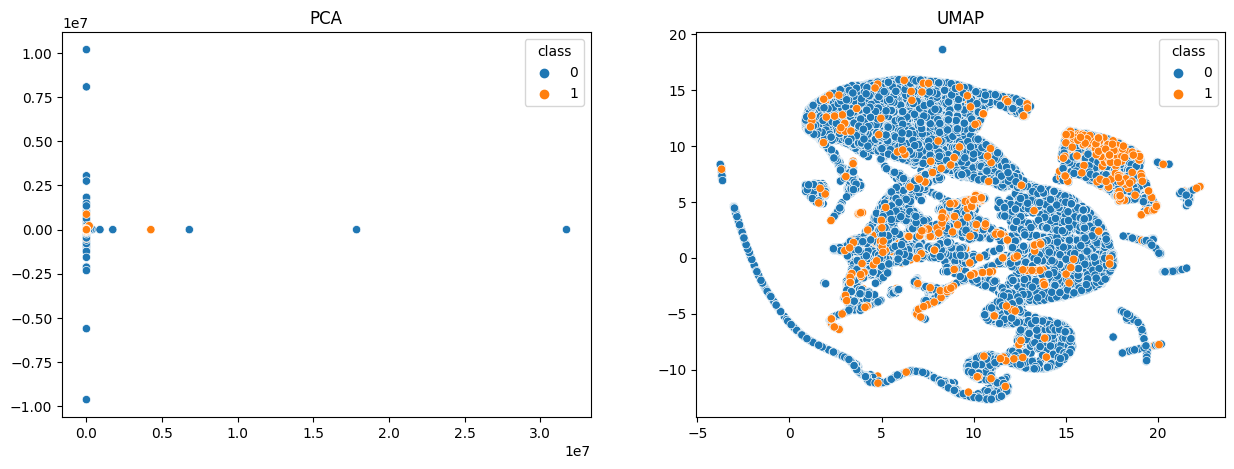

In [456]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_imputed_iterative_o, ax=ax[0])
ax[0].set_title('PCA')
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_imputed_iterative_o, ax=ax[1])
ax[1].set_title('UMAP')
plt.show()

In [464]:
pca_32 = PCA(n_components=32, random_state=SEED)
X_pca_32_s = pca_32.fit_transform(X_imputed_s_scaled)

In [465]:
results = []

for data, title in zip([(X_pca, y_imputed_iterative_o), (X_pca_32, y_imputed_iterative_o), (X_umap, y_imputed_iterative_o), (X_umap_32, y_imputed_iterative_o)], ['PCA 2D', 'PCA 32D', 'UMAP 2D', 'UMAP 32D']):
    results.append(test_classification(data[0], data[1], title))

results.append(test_classification(X_pca_32_s, y, 'PCA 32D Simple Scaled'))

pd.DataFrame(results)

,Name,Accuracy,Precision,Recall,F1
0,PCA 2D,0.946082,0.089552,0.014851,0.025478
1,PCA 32D,0.966757,0.890323,0.341584,0.493739
2,UMAP 2D,0.947257,0.277228,0.069307,0.110891
3,UMAP 32D,0.948549,0.311111,0.069307,0.113360
4,PCA 32D Simple Scaled,0.948948,0.194444,0.016787,0.030905


# Feature selection

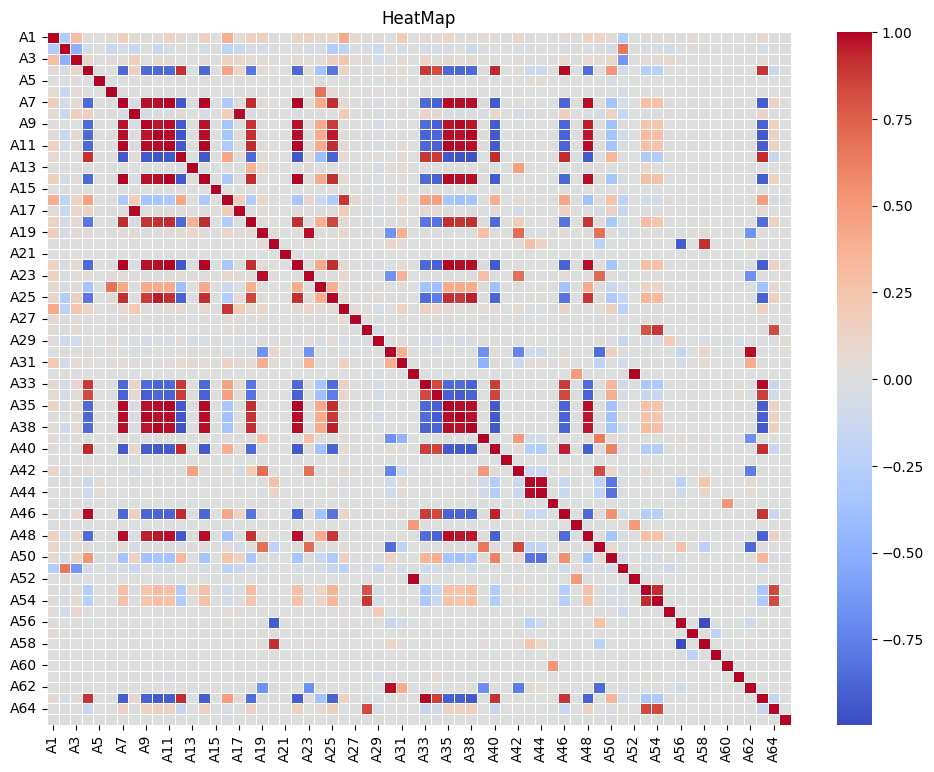

In [466]:
data_preprocesed = pd.DataFrame(X_imputed_iterative_o, columns=X.columns)
data_preprocesed['class'] = y_imputed_iterative_o


plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(data_preprocesed.corr(), cmap='coolwarm', linewidths=.5)
plt.title('HeatMap')
plt.show()

In [467]:
threshold = 0.8

def high_cor_function(df):
    cor = df.corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    display(high_cor[high_cor>thresh])

high_cor_function(data_preprocesed.drop('class', axis=1))

max corr: 0.9999995894697922 , min corr:  -0.9970011983009809


A7   A14    1.000000
A11  A7     0.999108
A14  A11    0.999107
A38  A10    0.998381
A35  A22    0.997249
              ...   
A34  A46    0.832593
A64  A28    0.831010
A42  A49    0.828967
A54  A64    0.828578
A34  A4     0.825116
Length: 100, dtype: float64

In [469]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

print((data_preprocesed.shape[0], data_preprocesed.shape[1]-1))
data = trimm_correlated(data_preprocesed.drop('class', axis=1), 0.997249)
print(data.shape)

(42562, 63)
(42562, 59)


In [470]:
X_f = data
y_f = y_imputed_iterative_o

list_of_results = [test_classification(X_f, y_f, 'Correlation')]

pd.DataFrame(list_of_results)

,Name,Accuracy,Precision,Recall,F1
0,Correlation,0.966639,0.875,0.346535,0.496454


In [472]:
# Suprizingly the best

def test_classification(X, y, title='Random Forest'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
    clf = DecisionTreeClassifier(random_state=SEED)
    clf.fit(X_train, y_train)
    # check the most true positive
    y_pred = clf.predict(X_test)
    return {
        'Name': title,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

list_of_results = [test_classification(X_imputed_simple, y, 'Decision Tree')]
pd.DataFrame(list_of_results)

,Name,Accuracy,Precision,Recall,F1
0,Decision Tree,0.96174,0.61,0.585132,0.597307
